In [1]:
# import the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

### Conect to the database

In [2]:
# connect to database

conn = sqlite3.connect('../data/prod_sample.db')

In [3]:
conn

In [4]:
# identify tables in database

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('stock_description',), ('online_retail_history',)]


### Online Retail History Table Exploration

In [30]:
# write sql query to select online retail history data

query = """select *
          from online_retail_history
          where CustomerID is not null
           and Price < 7
           and Quantity > 0
           and Quantity < 50
"""

online_retail_history = pd.read_sql(query, conn)
online_retail_history.head()


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom


In [31]:
# structure of the data

online_retail_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349922 entries, 0 to 349921
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      349922 non-null  object 
 1   StockCode    349922 non-null  object 
 2   Quantity     349922 non-null  int64  
 3   InvoiceDate  349922 non-null  object 
 4   Price        349922 non-null  float64
 5   CustomerID   349922 non-null  object 
 6   Country      349922 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 18.7+ MB


In [32]:
# dimension of data

online_retail_history.shape

(349922, 7)

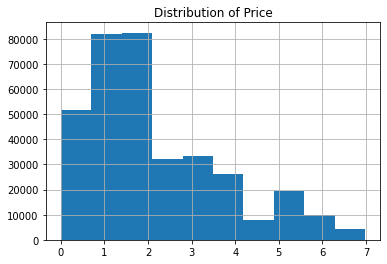

In [33]:
# distribution of Price

online_retail_history.Price.hist()
plt.title("Distribution of Price");

In [34]:
online_retail_history.Price.describe()

count    349922.000000
mean          2.142553
std           1.511949
min           0.000000
25%           0.950000
50%           1.650000
75%           2.950000
max           6.980000
Name: Price, dtype: float64

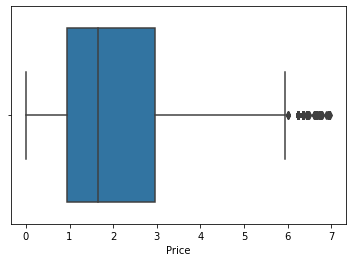

In [35]:
sns.boxplot(x = online_retail_history.Price);

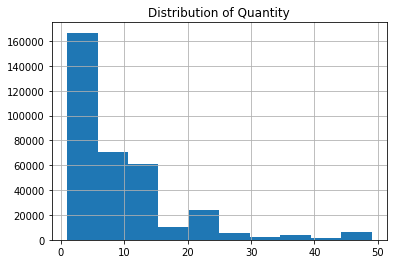

In [36]:
online_retail_history.Quantity.hist()
plt.title("Distribution of Quantity");

In [37]:
online_retail_history.Quantity.describe()

count    349922.000000
mean          8.725562
std           9.273373
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max          49.000000
Name: Quantity, dtype: float64

/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


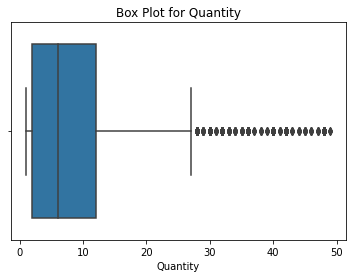

In [38]:
sns.boxplot(online_retail_history.Quantity)
plt.title("Box Plot for Quantity");

In [39]:
q1 = np.percentile(online_retail_history.Quantity, 25)
q3 = np.percentile(online_retail_history.Quantity, 75)

print("The 25th percentile is", q1)
print("The 75th percentile is", q3)


The 25th percentile is 2.0
The 75th percentile is 12.0


In [40]:
iqr = q3 - q1
print("The iqr is", iqr)

The iqr is 10.0


In [41]:
lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr

print("The lb is", lb)
print("The ub is", ub)

The lb is -13.0
The ub is 27.0


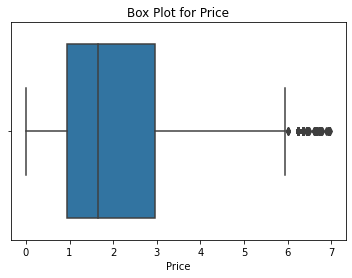

In [46]:
sns.boxplot(x = online_retail_history.Price)
plt.title("Box Plot for Price");

In [45]:
online_retail_history.Price.describe()

count    349922.000000
mean          2.142553
std           1.511949
min           0.000000
25%           0.950000
50%           1.650000
75%           2.950000
max           6.980000
Name: Price, dtype: float64

In [47]:
q1 = np.percentile(online_retail_history.Price, 25)
q3 = np.percentile(online_retail_history.Price, 75)
iqr = q3 - q1

ub = q3 + 1.5*iqr
lb = q1 - 1.5*iqr

print("The lower bound is:", lb)
print("The upper bound is:", ub)

The lower bound is: -2.05
The upper bound is: 5.95


In [49]:
online_retail_history[(online_retail_history.Price > ub)].shape[0]

5578

In [51]:
# correlations

online_retail_history.corr()

,Quantity,Price
Quantity,1.000000,-0.319196
Price,-0.319196,1.000000


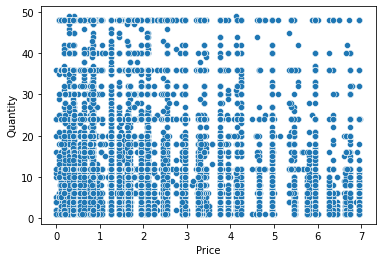

In [52]:
sns.scatterplot(data=online_retail_history, x="Price", y="Quantity");

In [53]:
online_retail_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349922 entries, 0 to 349921
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      349922 non-null  object 
 1   StockCode    349922 non-null  object 
 2   Quantity     349922 non-null  int64  
 3   InvoiceDate  349922 non-null  object 
 4   Price        349922 non-null  float64
 5   CustomerID   349922 non-null  object 
 6   Country      349922 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 18.7+ MB


In [54]:
online_retail_history.Country.value_counts()

United Kingdom          314896
Germany                   7775
France                    7183
EIRE                      5782
Spain                     2104
Belgium                   1706
Switzerland               1554
Portugal                  1327
Norway                     873
Netherlands                858
Australia                  626
Italy                      615
Channel Islands            562
Finland                    550
Cyprus                     507
Austria                    350
Denmark                    323
Sweden                     275
Poland                     268
Unspecified                215
Israel                     212
Japan                      194
Singapore                  178
Iceland                    174
USA                        170
Canada                     136
Greece                     128
Malta                       93
United Arab Emirates        60
European Community          47
RSA                         46
Lithuania                   35
Lebanon 

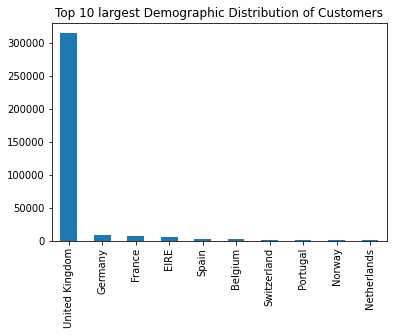

In [59]:
online_retail_history.Country.value_counts().nlargest(10).plot(kind = 'bar')
plt.title("Top 10 largest Markers");

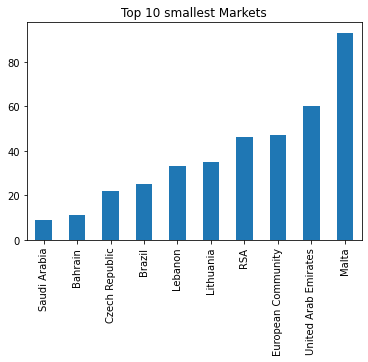

In [62]:
online_retail_history.Country.value_counts().nsmallest(10).plot(kind = 'bar')
plt.title("Top 10 smallest Markets");